<a href="https://colab.research.google.com/github/YuanGongND/ast/blob/master/colab/torchaudio_SpecMasking_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.11.0+cu113
--2022-05-08 21:44:59--  https://github.com/karolpiczak/ESC-50/raw/master/audio/1-100032-A-0.wav
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/karolpiczak/ESC-50/master/audio/1-100032-A-0.wav [following]
--2022-05-08 21:44:59--  https://raw.githubusercontent.com/karolpiczak/ESC-50/master/audio/1-100032-A-0.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 441044 (431K) [audio/wav]
Saving to: ‘test.wav’

test.wav            100%[===================>] 430.71K  --.-KB/s    in 0.04s   

2022-05-08 21:44:59 (11.9 MB/s) - ‘test.wav’ saved [441044/441044]

torch.Size([1, 128, 1376])


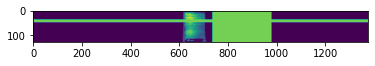

In [ ]:
import torch, torchaudio
from matplotlib import pyplot as plt

print(torchaudio.__version__)

!wget https://github.com/karolpiczak/ESC-50/raw/master/audio/1-100032-A-0.wav -O test.wav
waveform, _ = torchaudio.load('test.wav')
fbank = torchaudio.compliance.kaldi.fbank(waveform, htk_compat=True, sample_frequency=16000, use_energy=False, window_type='hanning', num_mel_bins=128, dither=0.0, frame_shift=10)

freqm = torchaudio.transforms.FrequencyMasking(48)
timem = torchaudio.transforms.TimeMasking(1000)
fbank = torch.transpose(fbank, 0, 1)

# NOTE this line, this is the trick, new torchaudio expect [1, freq, time] while old support [freq, time]
# comment this line will lead to an issue.
fbank = fbank.unsqueeze(0)
print(fbank.shape)
fbank = freqm(fbank)

plt.imshow(fbank[0].cpu().numpy())

fbank = timem(fbank)

plt.imshow(fbank[0].cpu().numpy())
fbank = fbank.squeeze(0)
print(fbank.shape)